# Day 04 – Statistics

---

## ◙ Topics Covered
- Statistics


---

## ‣ Problem 1: Real-World Everyday-Use Problem

**Problem Statement:**
A restaurant manager wants to understand how different combinations of customer gender and smoking habits influence the average total bill. You're provided with a dataset that contains columns like total_bill, sex, and smoker.

Your task is to present a visual comparison showing:

- The average total bill for each combination of gender and smoker status (e.g., male-smoker, female-non-smoker, etc.).

- The variation within these combinations using confidence intervals.

- Clear category labels on axes.

**Input ➤**

A DataFrame df with at least the following columns:

- 'total_bill' (numerical)

- 'sex' (categorical: 'Male', 'Female')

- 'smoker' (categorical: 'Yes', 'No')

**Output ➤**

A visual chart that:

- Compares the average total_bill across all sex + smoker combinations

- Shows confidence intervals to represent variability

- Is clean, readable, and well-labeled



**Code ➤**

   total_bill     sex smoker
0       25.92    Male    Yes
1       18.70  Female     No
2       31.76    Male    Yes
3       25.71    Male    Yes
4       34.33    Male     No





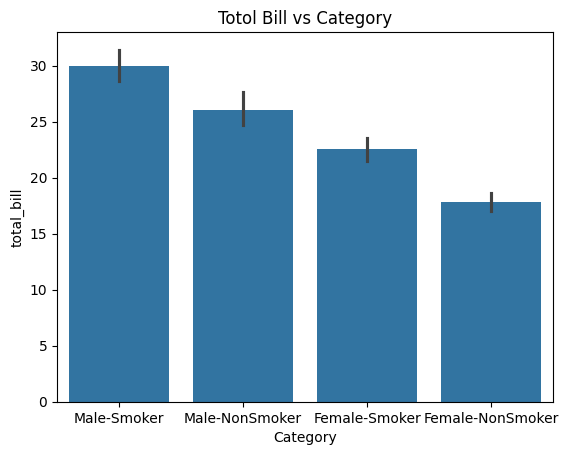

In [89]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
n_samples = 200

# Randomly generate combinations
sex = np.random.choice(['Male', 'Female'], size=n_samples)
smoker = np.random.choice(['Yes', 'No'], size=n_samples)

# Generate total_bill based on combination of sex and smoker
total_bill = []
for s, sm in zip(sex, smoker):
    if s == 'Female' and sm == 'No':
        bill = np.random.normal(loc=18, scale=3)  # avg 18, std dev 3
    elif s == 'Female' and sm == 'Yes':
        bill = np.random.normal(loc=22, scale=4)
    elif s == 'Male' and sm == 'No':
        bill = np.random.normal(loc=25, scale=5)
    else:  # Male and Yes
        bill = np.random.normal(loc=30, scale=6)
    total_bill.append(round(bill, 2))

# Create DataFrame
df = pd.DataFrame({
    'total_bill': total_bill,
    'sex': sex,
    'smoker': smoker
})

# Show first few rows
print(df.head())


# creating the sex-smoker combination - 4 cat
my=df[(df['sex']=="Male") & (df["smoker"]=="Yes")].copy()
mn=df[(df['sex']=="Male") & (df["smoker"]=="No")].copy()
fy=df[(df['sex']=="Female") & (df["smoker"]=="Yes")].copy()
fn=df[(df['sex']=="Female") & (df["smoker"]=="No")].copy()

# creating new categories
my['Category']="Male-Smoker"
mn['Category']="Male-NonSmoker"
fy['Category']="Female-Smoker"
fn['Category']="Female-NonSmoker"

# merging cat
final_df=pd.concat([my.iloc[:,[0,3]],mn.iloc[:,[0,3]],fy.iloc[:,[0,3]],fn.iloc[:,[0,3]] ])

print("\n\n")


# cretaing box plot
import seaborn as sns

sns.barplot(x="Category",y="total_bill",data=final_df)
plt.title("Totol Bill vs Category")
plt.show()




## ‣ Problem 2: Real-World Everyday-Use Problem

**Problem Statement:**
A local bakery wants to analyze the sales data of different types of pastries over the last month. They want to understand which pastry sold the most. You are provided with a dataset that contains the name of each pastry and the number of units sold.

Your task is to:

- Create a frequency table of the pastries.

- Represent the frequency of each pastry with a bar chart and a pie chart, showing the percentage sales of each.

**Input ➤**

A DataFrame sales_data with at least the following columns:

- 'pastry'    # categorical values: 'Croissant', 'Muffin', 'Danish', etc.
- 'sales'     # numerical values: number of units sold

**Output ➤**

A frequency table showing the count of each pastry.

Two visualizations:

- A bar chart displaying the number of sales per pastry.

- A pie chart showing the percentage sales of each pastry.

**Code ➤**

      pastry  sales
0  Croissant     23
1  Croissant     15
2  Croissant     21
3  Croissant     25
4  Croissant     15



      Pastry  Sales
0  Croissant   4013
1     Muffin   2880
2     Danish   2057
3      Donut   3559
4      Bagel   2370





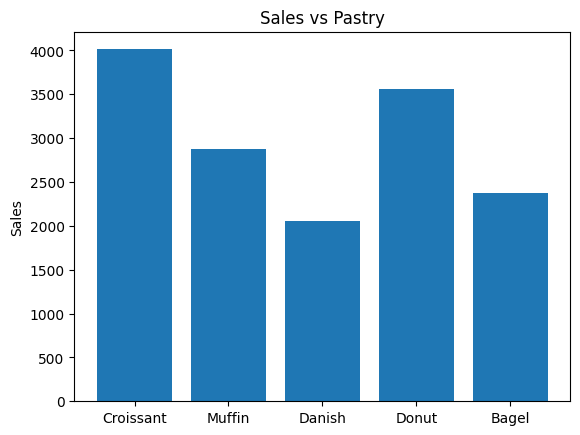

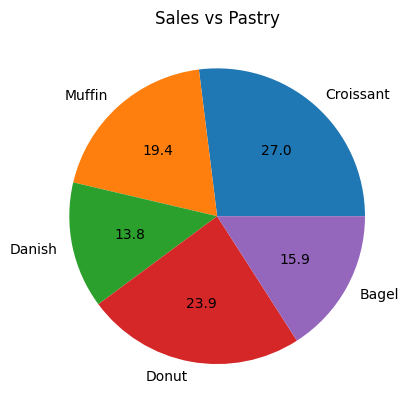

In [100]:
import pandas as pd
import numpy as np

# Define pastry types
pastries = ['Croissant', 'Muffin', 'Danish', 'Donut', 'Bagel']
n_samples_per_pastry = 200  # adjust as needed

# Seed for reproducibility
np.random.seed(42)

data = []

for pastry in pastries:
    # Simulate different average sales patterns
    if pastry == 'Croissant':
        sales = np.random.poisson(lam=20, size=n_samples_per_pastry)  # high demand
    elif pastry == 'Muffin':
        sales = np.random.poisson(lam=15, size=n_samples_per_pastry)
    elif pastry == 'Danish':
        sales = np.random.poisson(lam=10, size=n_samples_per_pastry)
    elif pastry == 'Donut':
        sales = np.random.poisson(lam=18, size=n_samples_per_pastry)
    else:  # Bagel
        sales = np.random.poisson(lam=12, size=n_samples_per_pastry)

    for s in sales:
        data.append({'pastry': pastry, 'sales': s})

# Create DataFrame
sales_data = pd.DataFrame(data)

print(sales_data.head())

print("\n\n")

# creating frequency table
Croissant=sales_data[sales_data["pastry"]=="Croissant"]['sales'].sum()
Muffin=sales_data[sales_data["pastry"]=="Muffin"]['sales'].sum()
Danish=sales_data[sales_data["pastry"]=="Danish"]['sales'].sum()
Donut=sales_data[sales_data["pastry"]=="Donut"]['sales'].sum()
Bagel	=sales_data[sales_data["pastry"]=="Bagel"]['sales'].sum()


sales=pd.DataFrame({"Pastry":["Croissant","Muffin","Danish","Donut","Bagel"],"Sales":[Croissant,Muffin,Danish,Donut,Bagel]})
print(sales)

print("\n\n")

# creating bar chart
import matplotlib.pyplot as plt

plt.bar(sales["Pastry"],sales["Sales"])
plt.ylabel("Sales")
plt.title("Sales vs Pastry")
plt.show()

print("\n\n")

# creating pie chart
plt.pie(sales["Sales"],labels=sales["Pastry"], autopct="%0.1f")
plt.title("Sales vs Pastry")
plt.show()

---

## ‣ Problem 3: Difficult Problem

**Problem Statement:**
You are analyzing a dataset with the ages of people attending a public event. The dataset contains both continuous data (ages of individuals) and categorical data (gender: male/female).

Your task is to:

- Perform univariate analysis on the ages to determine the mean, median, standard deviation, and variance.

- Visualize the distribution of the ages with a histogram and a box plot.

- Perform a bivariate analysis between gender and age using a box plot to compare the distribution of ages by gender.

**Input ➤**

A DataFrame event_data with the following columns:
- 'age'      # numerical values: age of attendees
- 'gender'   # categorical values: 'Male', 'Female'

**Output ➤**

- Summary statistics for the age column: mean, median, standard deviation, and variance.

- A histogram to show the distribution of ages.

- A box plot comparing age distributions for each gender.

**Code ➤**

   age  gender
0   58  Female
1   25  Female
2   19  Female
3   35    Male
4   33    Male





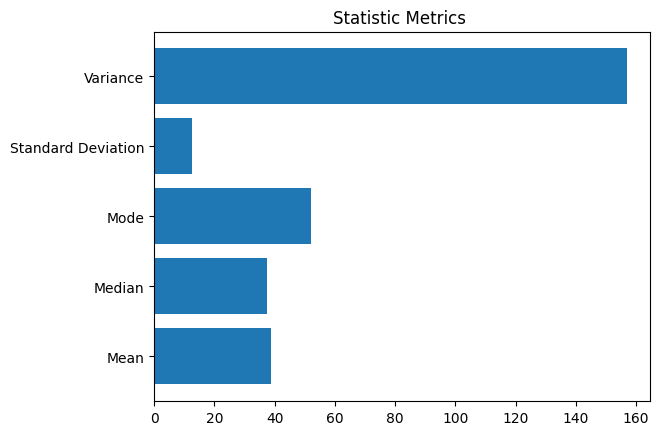

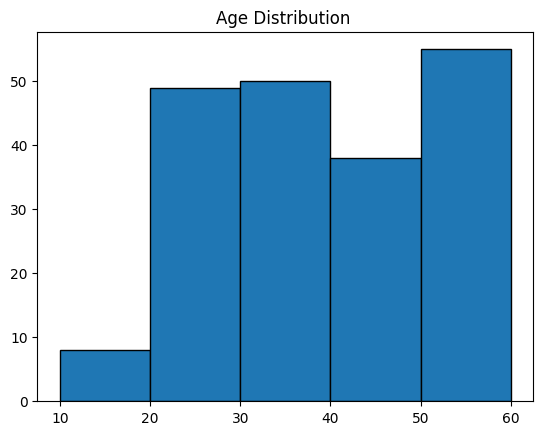

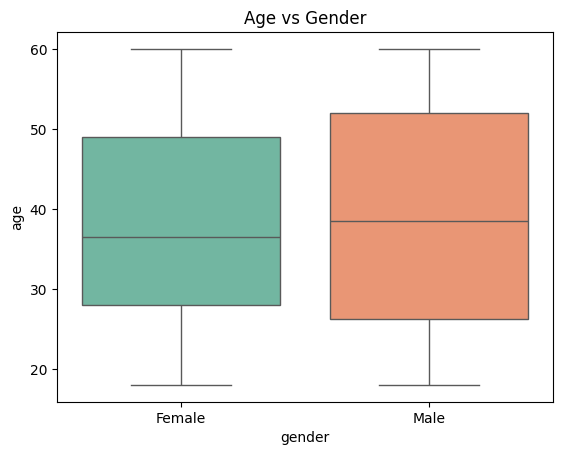

In [104]:
import pandas as pd
import random

# Set seed for reproducibility
random.seed(42)

# Generate pattern data
num_rows = 200
ages = [random.randint(18, 60) for _ in range(num_rows)]
genders = [random.choice(['Male', 'Female']) for _ in range(num_rows)]

# Create DataFrame
event_data = pd.DataFrame({
    'age': ages,
    'gender': genders
})

print(event_data.head())

print("\n\n")

# 3.1
# finding the mean, median , etc . and then making the frequency table
desc=pd.DataFrame({
    "Metric":["Mean","Median","Mode","Standard Deviation","Variance"],
    "Values":[float(event_data['age'].mean()),
event_data['age'].median(),
float(event_data['age'].mode()[0]),
event_data['age'].std(),
event_data['age'].var()]
})

plt.barh(desc["Metric"],desc["Values"])
plt.title("Statistic Metrics ")
plt.show()

print("\n\n")

# 3.2

# Distribution of Ages
# 1.Bins
bins=[10,20,30,40,50,60]
labels = ["11-20","21-30",'31-40',"41-50","51-60"]

event_data["Bins"]=pd.cut(event_data["age"],bins=bins,labels=labels)


# 2.Frequency table
ft=event_data["Bins"].value_counts().sort_index()
# 3.Histogram
# Plot bar chart of binned data (histogram style)

plt.hist(event_data['age'],bins=[10,20,30,40,50,60],edgecolor="black")
plt.title("Age Distribution ")
plt.show()

print("\n\n")

# 3.3

sns.boxplot(x=event_data["gender"],y=event_data["age"],data=event_data,palette='Set2',hue="gender")
plt.title("Age vs Gender")
plt.show()









---